# Асинхронное программирование (asyncio)

## References
- <a href="https://habr.com/ru/articles/667630/">Асинхронный python без головной боли (часть 1)</a>
- <a href="https://habr.com/ru/companies/wunderfund/articles/700474/">Полное руководство по модулю asyncio в Python. Часть 1</a>
- <a href="">текст</a>

##  <font color="yellow"> Введение в асинхронное программирование</font>
### Что такое асинхронное программирование?

Асинхронное программирование — это концепция программирования, при применении которой запуск длительных операций происходит без ожидания их завершения и не блокирует дальнейшее выполнение программы. Вместо этого запросы и вызовы функций производятся и выполняются в фоновом режиме, результаты их работы оказываются доступными не сразу, а через некоторое время. Это позволяет вызывающей стороне решать другие задачи, а результаты, ожидаемые после выполнения асинхронных вызовов, обрабатывать позже — либо тогда, когда они будут готовы, либо тогда, когда они понадобятся вызывающей стороне.

Мы не осуществляем контроль над тем, как или когда будет обработан запрос. Мы лишь сообщаем системе о том, что нам нужно, чтобы запрос был бы обработан тогда, когда наша программа занимается какими-то другими делами.

Выполнение асинхронного вызова функции часто приводит к предоставлении вызывающей стороне некоего идентификатора запроса, который вызывающая сторона может использовать для того, чтобы проверить состояние запроса или получить результаты. Такие идентификаторы часто называют объектами, ждущими результата выполнения задачи (```future```, объект ```Future```, преднамеченное значение, «футура»).

**Объект future**: идентификатор асинхронного вызова функции, позволяющий проверять состояние вызова и получать результаты работы функции.

Комбинацию асинхронного вызова функции и объекта ```Future``` часто называют асинхронной задачей из-за того, что такая комбинация даёт больше возможностей, чем обычный вызов функции. *Например — позволяет отменять запрос и выполнять другие действия.*

**Асинхронная задача**: этот термин используется для обозначения сущности, представляющей собой объединение асинхронного вызова функции и порождённого этим вызовом объекта Future.

---
### Зачем нужно асинхронное программирование?
Например, вместо того, чтобы ждать завершения НТТР-запроса перед продолжением выполнения, с помощью асинхронных coroutines Python вы можете отправить запрос и выполнить другие работы, которые ждут в очереди, ожидая завершения HTTP-запроса. Асинхронность кажется большой причиной, почему Node.js так популярен для серверного программирования. Большая часть кода, который мы пишем, особенно в тяжелых приложениях IO, таких как веб-сайты, зависит от внешних ресурсов.

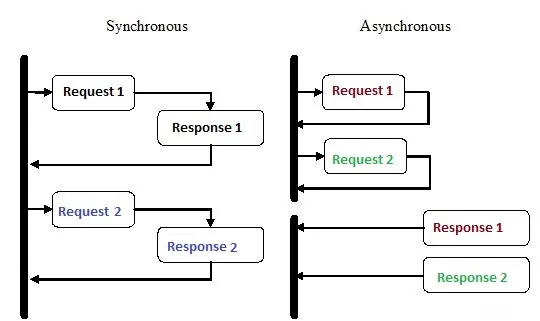

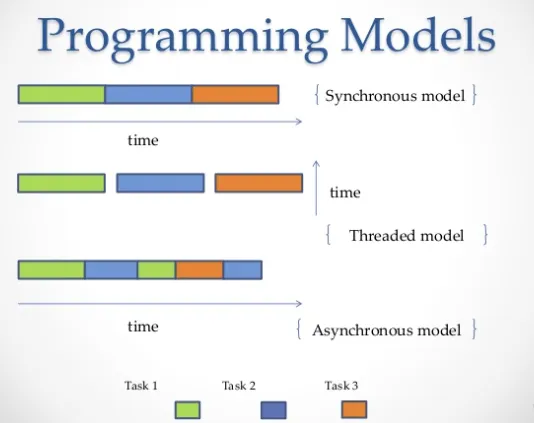

##  <font color="yellow">Основы asyncio</font>
### Что такое asyncio?
Асинхронные механизмы в Python можно реализовать разными способами, но при этом некоторые из них лучше других соответствуют модели конкурентности Python.

Этот модуль [asyncio] напрямую предлагает программисту среду для асинхронного программирования, в которой используется синтаксическая конструкция `async/await` и неблокирующий ввод/вывод с применением сокетов и подпроцессов.


### Преимущества и недостатки asyncio
Преимущества asyncio:

1. Асинхронность: Позволяет эффективно обрабатывать множество одновременных операций без блокировки потока выполнения, что повышает производительность приложений.

2. Удобство: Позволяет писать код, который легко читать и поддерживать, благодаря использованию асинхронных функций и ключевых слов, таких как async и await.

3. Интеграция с другими библиотеками: asyncio хорошо интегрируется с другими библиотеками, такими как aiohttp для асинхронных HTTP-запросов, aiomysql для работы с MySQL и другими.

4. Масштабируемость: Позволяет легко масштабировать приложения для обработки большого количества одновременных запросов и событий.

Недостатки asyncio:

1. Сложность: Асинхронное программирование может быть сложным для понимания и отладки, особенно для разработчиков, не знакомых с концепциями асинхронной работы и корутин.

2. Ограничения стандартной библиотеки: Некоторые функциональности могут быть ограничены стандартной библиотекой asyncio, и для решения некоторых задач могут потребоваться дополнительные сторонние библиотеки или инструменты.

3. Не все библиотеки поддерживают asyncio: Некоторые сторонние библиотеки и фреймворки могут быть несовместимы с asyncio или не иметь асинхронных аналогов, что может создавать проблемы при интеграции существующего кода.

4. В целом, asyncio представляет собой мощный инструмент для написания асинхронного кода в Python, который позволяет повысить производительность приложений, но требует от разработчиков понимания его концепций и особенностей.

### Асинхронные функции и корутины


#### Корутины
**Корутины** — это более общая форма подпрограмм. Подпрограммы имеют одну точку входа и одну точку выхода, а корутины поддерживают множество точек входа, выхода и возобновления их выполнения.

Другими словами: **Корутина** — это функция, выполнение которой можно приостановить и возобновить.


Корутину можно определить с использованием выражения `async def`. Она может принимать аргументы и возвращать значение — так же, как и функция.

Например:
```python
# определение корутины
async def custom_coro():
    # ...
```
Вызов функции корутины создаёт объект корутины, в основе которого лежит новый класс. При этом функция корутины не выполняется.

```python
...
#создание объекта корутины
coro = custom_coro()
```

Корутина может запустить другую корутину посредством выражения await.

Это выражение приостанавливает выполнение вызывающей стороны и планирует выполнение целевого объекта.

```python
...
#приостановить выполнение кода и запланировать выполнение целевого объекта
await custom_coro()
```

**Асинхронный итератор**: объект, который реализует методы `aiter()` и `anext()`. Метод `anext()` должен возвращать объект, допускающий ожидание. Конструкция async for разрешает объекты, допускающие ожидание, возвращённые методом `anext()` асинхронного итератора до тех пор, пока он не вызовет исключение `StopAsyncIteration`.

Другими словами: **Асинхронный итератор** — это итератор, который выдаёт объекты, допускающие ожидание.

Асинхронный итератор можно обойти, используя выражение async `for`.

```python
...
#обход асинхронного итератора
async for item in async_iterator:
    print(item)
```

Применение этой конструкции не приводит к параллельному выполнению цикла `for`.

Вместо этого вызывающая корутина, которая выполняет цикл `for`, будет приостанавливаться и самостоятельно ожидать каждый объект, допускающий ожидание, полученный из итератора.

#### Примеры использования
 В примере ниже мы будем использовать модуль `asyncio` для создания асинхронной функции, которая будет генерировать случайные числа в течение определенного количества итераций.

In [ ]:
import asyncio
import random

# Асинхронная функция, которая генерирует случайные числа
async def generate_random_numbers(count):
    for _ in range(count):
        yield random.randint(1, 100)
        await asyncio.sleep(1)  # Делаем паузу в 1 секунду между итерациями

# Асинхронная функция, которая обрабатывает сгенерированные числа
async def process_random_numbers():
    async for number in generate_random_numbers(5):  # Генерируем 5 случайных чисел
        print("Received:", number)

# Создаем событийный цикл asyncio
async def main():
    await process_random_numbers()

# Запускаем событийный цикл
await main()

Received: 41
Received: 44
Received: 54
Received: 86
Received: 47


- `generate_random_numbers` - асинхронная функция-генератор, которая возвращает случайные числа. Она использует `yield` для возврата значений и `await asyncio.sleep(1)` для имитации задержки в 1 секунду между итерациями.

- `process_random_numbers` - асинхронная функция, которая обрабатывает сгенерированные числа. Она использует асинхронный итератор `async for`, чтобы итерироваться по числам, сгенерированным функцией `generate_random_numbers`.

- `main` - асинхронная функция, которая запускает обработку сгенерированных чисел.

- `asyncio.run(main())` - это точка входа, которая запускает событийный цикл asyncio и вызывает функцию main() для выполнения программы.

## <font color="yellow">Модули asyncio</font>

Модуль `asyncio` даёт нам функции и объекты для разработки программ, основанных на корутинах с использованием парадигмы асинхронного программирования.

Центральной концепцией модуля `asyncio` является цикл событий [Event Loop].

### Event Loop
**Event Loop** — механизм, который выполняет программы, основанные на корутинах, и реализует кооперативную многозадачность корутин.

**Event Loop** — это база любого asyncio-приложения. Event Loop выполняет асинхронные задачи и коллбэки, сетевые операции ввода/вывода, подпроцессы.

Этот модуль предоставляет и высокоуровневый, и низкоуровневый API.

#### Роль event loop
Роль event loop (цикл событий) в асинхронном программировании, особенно в контексте asyncio в Python, заключается в том, чтобы эффективно управлять исполнением асинхронных задач. Event loop является основой асинхронного выполнения в asyncio, он следит за задачами (`coroutines`), выполняет их и управляет переключением контекста между ними.

В цикле событий задачи разбиваются на маленькие фрагменты, которые выполняются в краткие промежутки времени. Когда какая-то задача ожидает какого-то события (например, завершения операции ввода-вывода), event loop переключает выполнение на другие задачи, которые готовы к выполнению. Это позволяет асинхронному коду работать эффективно и избегать блокировок.

#### Примеры использования event loop
При запуске кода ниже, мы увидим, как три задачи запускаются параллельно и завершаются через некоторое время, при этом не блокируя друг друга благодаря использованию event loop.

In [ ]:
import asyncio

async def my_async_function(task_name):
    print(f'Starting task: {task_name}')
    # Подождем некоторое время для имитации асинхронной работы
    await asyncio.sleep(2)
    print(f'Finished task: {task_name}')

async def main():
    # Создаем список задач (coroutines)
    tasks = [
        my_async_function("Task 1: Water plants"),
        my_async_function("Task 2: Make some food"),
        my_async_function("Task 3: Pay taxes")
    ]

    # Запускаем все задачи в event loop
    await asyncio.gather(*tasks)

# Создаем event loop и запускаем основную функцию
await main()

Starting task: Task 1: Water plants
Starting task: Task 2: Make some food
Starting task: Task 3: Pay taxes
Finished task: Task 1: Water plants
Finished task: Task 2: Make some food
Finished task: Task 3: Pay taxes


- `my_async_function` - это простая асинхронная функция, которая просто печатает сообщение о начале выполнения, затем ждет 2 секунды (используя `await asyncio.sleep(2)`) и печатает сообщение о завершении выполнения.

- `main` - это основная асинхронная функция, в которой мы создаем список задач (`coroutines`) и используем `asyncio.gather()` для их выполнения параллельно.

- `asyncio.run(main())` - это точка входа, в которой мы запускаем основную асинхронную функцию `main()` в event loop.

### Futures
#### Понятие Future

В asyncio, `Future` - это специальный объект, который представляет собой асинхронную операцию, которая ещё не завершена. `Future` представляет собой простой механизм для работы с результатом асинхронной операции, который может быть доступен в будущем. Он позволяет асинхронно ожидать завершения операции, вместо блокировки потока выполнения.
#### Применение Future в asyncio
1. Асинхронные операции возвращают Future. Например, `asyncio.open_connection()` возвращает Future, который можно использовать для установления соединения с сервером.

2. Ожидание завершения операции с помощью `await` позволяет продолжить выполнение кода после того, как асинхронная операция завершится. Например:

```python
result = await asyncio.open_connection('example.com', 80)
```
3. Установка результата Future с помощью метода `set_result()`. Это полезно, когда у нас есть результат асинхронной операции, который нужно передать в другую часть кода.

4. Обработка ошибок: Future позволяет обрабатывать ошибки, возникающие во время выполнения асинхронной операции. Вы можете установить исключение в Future с помощью метода `set_exception()`.


В примере, приведённом ниже, `my_async_function` возвращает `Future`, в который устанавливается результат асинхронной операции (в данном случае, просто строка `"Hello, Future!"`). Затем основная функция main ожидает завершения этой асинхронной функции и получает результат из `Future`.

In [ ]:
import asyncio

# Функция, которая асинхронно выполняется и возвращает Future
async def my_async_function():
    # Создаем Future
    future = asyncio.Future()

    # Имитация асинхронной работы
    await asyncio.sleep(2)

    # Устанавливаем результат Future
    future.set_result("Hello, Future!")

    return future

async def main():
    # Ожидаем завершения асинхронной функции
    result_future = await my_async_function()

    # Получаем результат из Future
    result = result_future.result()
    print(result)

# Запускаем основную асинхронную функцию
await main()

Hello, Future!


### Tasks
#### Что такое Task в asyncio?
В asyncio `Task` представляет собой специальный тип объекта, который используется для управления выполнением асинхронных функций (`coroutines`). `Task` позволяет запускать асинхронные функции в `event loop` и управлять их выполнением.
#### Преимущества использования Tasks
1. Task позволяет управлять выполнением асинхронных функций в `event loop`. Мы можем создать задачу (`task`) для выполнения определенной асинхронной функции и управлять её жизненным циклом.

2. Ожидание завершения, используя ключевое слово `await`, что позволяет организовать последовательность выполнения асинхронных операций.

3. Task автоматически обрабатывает исключения, возникающие во время выполнения асинхронной функции. Также можно использовать блок `try-except` для обработки ошибок в коде, который ожидает выполнения задачи.

4. Отмена операции/задачи, используя метод `task.cancel()`. Это полезно, если нужно прервать выполнение длительной операции.

5. Мониторинг состояния: Task предоставляет методы для проверки состояния задачи (запущена, выполнена, отменена и т.д.), что позволяет эффективно отслеживать ход выполнения асинхронных операций.

В примере ниже создается задача (`task`) для выполнения асинхронной функции `my_async_function()`. Затем основная функция `main` ожидает завершения выполнения этой задачи и получает результат, который был возвращен из асинхронной функции.

In [ ]:
import asyncio

async def my_async_function():
    print("Start async function")
    await asyncio.sleep(2)
    print("Finish async function")
    return "Result of async function"

async def main():
    task = asyncio.create_task(my_async_function())
    result = await task
    print("Task result:", result)

# Запускаем основную асинхронную функцию
await main()

Start async function
Finish async function
Task result: Result of async function


##  <font color="yellow">Работа с сетевыми операциями в asyncio</font>

### Асинхронные сокеты
Асинхронные сокеты - это механизм, который позволяет выполнять сетевые операции, такие как установка и обмен данными через сетевое соединение, в асинхронном режиме.




#### Особенности работы с сокетами в asyncio
1. Асинхронность

  Все операции ввода-вывода, связанные с сокетами, могут выполняться асинхронно, что позволяет эффективно обрабатывать множество соединений одновременно без блокировки основного потока выполнения.

2. Event loop

  Для работы с сокетами в asyncio необходимо использовать событийный цикл (event loop), который управляет выполнением асинхронных операций ввода-вывода. Event loop позволяет эффективно переключаться между различными сетевыми операциями без блокировки.

3. Протоколы

  asyncio предоставляет возможность создавать пользовательские протоколы для обмена данными через сокеты. Протоколы могут быть реализованы как классы, которые наследуются от базовых классов asyncio, таких как `asyncio.Protocol` или `asyncio.StreamReaderProtocol`.

#### Примеры работы с сокетами
Создание сервера

In [ ]:
import asyncio

async def handle_client(reader, writer):
    data = await reader.read(100)
    message = data.decode()
    print(f"Received message: {message}")
    writer.write(data)
    await writer.drain()
    writer.close()

async def main():
    server = await asyncio.start_server(handle_client, '127.0.0.1', 8888)
    async with server:
        await server.serve_forever()

#asyncio.run(main())
await main()

Создание клиента

In [ ]:
import asyncio

async def main():
    reader, writer = await asyncio.open_connection('127.0.0.1', 8888)

    message = "Hello, server!"
    writer.write(message.encode())
    await writer.drain()

    data = await reader.read(100)
    print(f"Received message from server: {data.decode()}")

    writer.close()
    await writer.wait_closed()

#asyncio.run(main())
await main()

### HTTP запросы
#### Асинхронные HTTP запросы
#### Примеры использования aiohttp

##  <font color="yellow">Примеры применения asyncio</font>
### Асинхронный веб-скрапинг
Этот подход позволяет эффективно собирать данные с нескольких веб-сайтов одновременно, минимизируя время ожидания ответов от серверов. Основная идея заключается в том, чтобы асинхронно отправлять запросы к веб-сайтам и обрабатывать полученные ответы без блокировки основного потока выполнения.
#### Описание задачи


#### Пример кода на asyncio для веб-скрапинга

In [ ]:
import asyncio
import aiohttp
from bs4 import BeautifulSoup

async def fetch_data(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            return await response.text()

async def parse_data(html):
    soup = BeautifulSoup(html, 'html.parser')
    # Здесь можно написать код для парсинга нужной информации из HTML

async def scrape_website(url):
    html = await fetch_data(url)
    await parse_data(html)

async def main():
    urls = [
        'https://habr.com/ru/companies/wunderfund/articles/700474/',
        'https://vk.com/fegasaren',
        'https://example.com/page3'
    ]
    tasks = [scrape_website(url) for url in urls]
    await asyncio.gather(*tasks)

#asyncio.run(main())
await main()

- `fetch_data` - это асинхронная функция для отправки HTTP-запросов и получения HTML-кода страницы.
- `parse_data` - это асинхронная функция для парсинга HTML-кода и извлечения нужной информации с использованием, например, библиотеки `BeautifulSoup`.
- `scrape_website` - это асинхронная функция, которая вызывает `fetch_data` для загрузки HTML-кода страницы, а затем вызывает parse_data для извлечения информации.
- В `main` создаем список URL-адресов, для которых хотим выполнить скрапинг, создаем задачи для каждого URL-адреса и используем `asyncio.gather` для их параллельного выполнения.

### Асинхронный доступ к базе данных
Такой доступ позволяет выполнять операции с базой данных без блокировки основного потока выполнения, что особенно полезно в асинхронных приложениях, таких как веб-серверы или микросервисы.

Проблема синхронного доступа к базе данных заключается в том, что операции ввода-вывода (например, отправка запросов и получение ответов от базы данных) часто являются блокирующими. В многопоточном или многопроцессном окружении это может привести к заблокированным потокам или процессам, что снижает производительность и масштабируемость приложения.

Асинхронный доступ к базе данных с использованием asyncio позволяет избежать этих проблем, поскольку операции с базой данных выполняются асинхронно, не блокируя основной поток выполнения. Это позволяет эффективно обрабатывать множество запросов к базе данных одновременно и повышает производительность и масштабируемость приложения.


#### Примеры решения
1. `aiomysql`:
  
  Это асинхронный драйвер для работы с MySQL базами данных. Он предоставляет асинхронные методы для выполнения запросов к базе данных и эффективно интегрируется с asyncio.


In [ ]:
import asyncio
import aiomysql

async def main():
    conn = await aiomysql.connect(host='localhost', port=3306,
                                   user='root', password='password',
                                   db='test', loop=asyncio.get_event_loop())

    async with conn.cursor() as cur:
        await cur.execute("SELECT * FROM my_table")
        result = await cur.fetchall()
        print(result)

    conn.close()

#asyncio.run(main())
await main()

2. `aiopg`:

  Это асинхронный драйвер для работы с PostgreSQL базами данных. Он предоставляет асинхронные методы для выполнения запросов к базе данных и также хорошо интегрируется с asyncio.

In [ ]:
import asyncio
import aiopg

async def main():
    dsn = 'dbname=test user=postgres password=secret host=127.0.0.1'
    async with aiopg.create_pool(dsn) as pool:
        async with pool.acquire() as conn:
            async with conn.cursor() as cur:
                await cur.execute("SELECT * FROM my_table")
                result = await cur.fetchall()
                print(result)

#asyncio.run(main())
await main()

3. `motor`:

  Это асинхронный драйвер для работы с MongoDB базами данных. Он предоставляет асинхронные методы для выполнения запросов к базе данных и также совместим с asyncio.

In [ ]:
import asyncio
import motor.motor_asyncio

async def main():
    client = motor.motor_asyncio.AsyncIOMotorClient('mongodb://localhost:27017')
    db = client.test_database
    collection = db.test_collection

    result = await collection.find_one({'_id': 1})
    print(result)

#asyncio.run(main())
await main()

##  <font color="yellow">Преимущества и недостатки асинхронного программирования</font>
### Преимущества
1. Асинхронное программирование позволяет эффективно использовать ресурсы компьютера, так как операции ввода-вывода (I/O) не блокируют поток выполнения. Это позволяет одновременно обрабатывать множество операций без простоя.

2. Асинхронные приложения могут быть более отзывчивыми, поскольку не блокируются на долгие операции ввода-вывода. Это особенно важно для веб-серверов и других приложений, в которых необходимо обрабатывать большое количество одновременных запросов.

3. Асинхронное программирование позволяет легко масштабировать приложения, так как оно не зависит от количества потоков или процессов, а вместо этого использует один поток событийного цикла (`event loop`).

4. В некоторых случаях асинхронное программирование может быть более удобным для разработчика, особенно при работе с сетевыми приложениями или приложениями с большим количеством ввода-вывода.

### Недостатки
1. Асинхронное программирование может быть сложнее для отладки и понимания, особенно для разработчиков, не имеющих опыта работы с асинхронным кодом. Поток управления может быть менее предсказуемым из-за использования асинхронных вызовов.

2. Некоторые типы операций могут быть сложнее реализовать асинхронно, чем синхронно. Например, сложности могут возникнуть при синхронизации доступа к разделяемым ресурсам в асинхронном коде.

3. Обработка ошибок в асинхронном коде может быть сложнее, так как ошибки, возникающие в асинхронных вызовах, могут быть неочевидными и трудно отследить.

### Сравнение с синхронным программированием
- Производительность

 Асинхронное программирование может быть более производительным, особенно в сетевых приложениях, где много времени тратится на ожидание ответов от удаленных серверов.

- Простота использования
  
  Синхронное программирование часто более просто в использовании и понимании, особенно для начинающих разработчиков.

- Отзывчивость
  
  Асинхронное программирование обеспечивает лучшую отзывчивость в приложениях с большим количеством одновременных запросов, в то время как синхронное программирование может привести к блокировке потока выполнения и низкой отзывчивости приложения.

##  <font color="yellow">Заключение</font>

### Подведение итогов
В итоге, выбор между асинхронным и синхронным программированием зависит от конкретных требований вашего приложения, уровня опыта разработчиков и других факторов, таких как производительность и отзывчивость.

### Перспективы развития асинхронного программирования

Поскольку асинхронное программирование становится все более популярным, можно ожидать, что его развитие будет продолжаться и дальше.

- Можно ожидать дальнейшего расширения поддержки и улучшения производительности асинхронных фреймворков.

- Можно ожидать, что будут разработаны новые оптимизации и улучшения производительности для асинхронных приложений и фреймворков.

- Расширение области применения: например, асинхронное программирование может быть полезным для обработки больших объемов данных, машинного обучения и других областей.

- Могут появиться новые паттерны для работы с асинхронными сетевыми приложениями, распределенными системами и микросервисами.